# Medical Cost Personal

The informartion about the dataset can be found here: https://www.kaggle.com/datasets/mirichoi0218/insurance here our goal is to do a full analysis in the dataset trying to understand what impacts the costs at the most instead of trying to predict the value, let do it!

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [23]:
df = pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Any null data, means that the dataset is well treated

In [25]:
print(df.nunique())
df.dtypes

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

this data can have better types that impacts less the memory, so lets apply them

In [26]:
df['is_male'] = df['sex'] == 'male'
df = df.drop('sex',axis=1)
df['region'] = df['region'].astype('category')
df['smoker'] = df['smoker'].map({'yes':True,'no':False})
df['age'] = df['age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int32   
 1   bmi       1338 non-null   float64 
 2   children  1338 non-null   int64   
 3   smoker    1338 non-null   bool    
 4   region    1338 non-null   category
 5   charges   1338 non-null   float64 
 6   is_male   1338 non-null   bool    
dtypes: bool(2), category(1), float64(2), int32(1), int64(1)
memory usage: 40.8 KB


# Analytics 

now that we have done some memory improvement in the data, lets start to check up what affects each stuff, so correlation first

<AxesSubplot: >

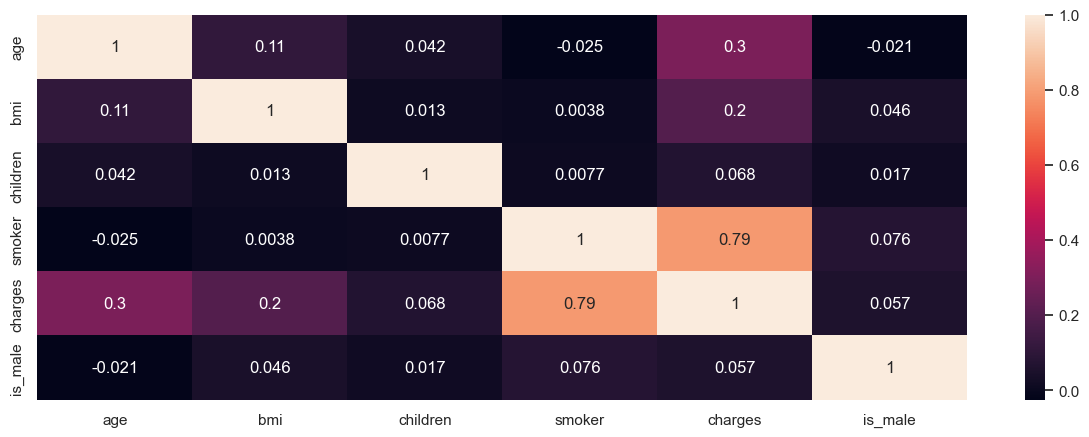

In [78]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Se Charges and smoker has a big linear relationship, bmi and age seems to impact directly too, lets see the distributions

<Figure size 1500x500 with 0 Axes>

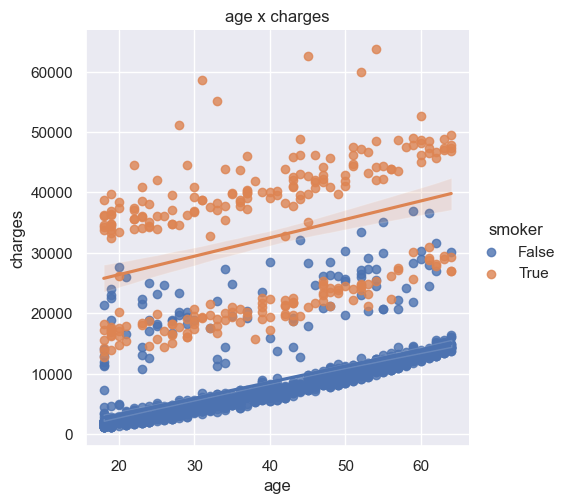

In [79]:
plt.figure(figsize=(15,5))
sns.lmplot(df,x='age',y='charges',hue='smoker')
plt.title('age x charges')
plt.show()

we clearly see a linear increase but we see a direct threshold dividing the charges, but age impacts directly too

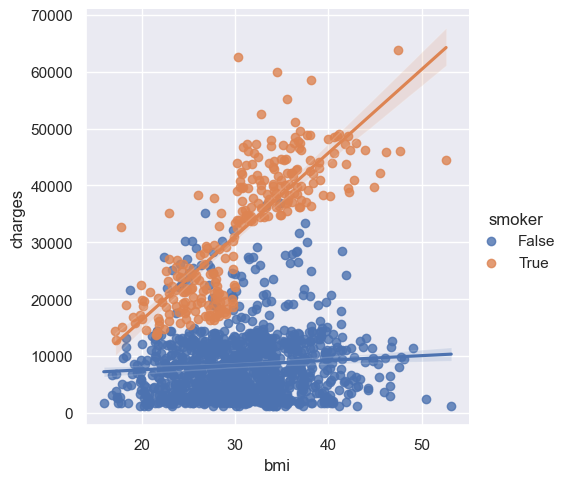

In [80]:
sns.lmplot(df,x='bmi',y='charges',hue='smoker')
plt.show()

here is really interesting, if you are a smoker the bmi really impacts in your costs, but if don't smoke it doesn't impact so much

In [61]:
df.groupby('smoker')['charges'].mean()

smoker
False     8434.268298
True     32050.231832
Name: charges, dtype: float64

if you are a smoker the cost is 3.8x higher! DON' SMOKE PLEASE

In [70]:
df.groupby('region')['charges'].mean().sort_values()

region
southwest    12346.937377
northwest    12417.575374
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64

seems that east region has highers costs but i suppose to be by the amout of smokers there actually

In [76]:
display(df.groupby('region')['smoker'].mean().sort_values()/df['smoker'].mean())
display(df.groupby('region')['charges'].mean().sort_values()/df['charges'].mean())

region
northwest    0.871465
southwest    0.871465
northeast    1.009800
southeast    1.220803
Name: smoker, dtype: float64

region
southwest    0.930410
northwest    0.935733
northeast    1.010246
southeast    1.110395
Name: charges, dtype: float64

the hypothesis seems to be right